In [37]:
%load_ext lab_black

from puzzles import load_lines

data = load_lines(14)

# text = s.strip().split("\n")

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [41]:
data = """NNCB

CH -> B
HH -> N
CB -> H
NH -> C
HB -> C
HC -> B
HN -> C
NN -> C
BH -> H
NC -> B
NB -> B
BN -> B
BB -> N
BC -> B
CC -> N
CN -> C""".split(
    "\n"
)

In [73]:
def test_n(s, n):
    poly = deque(s)
    for step in range(n):
        i = -1
        for _ in range(len(poly) - 1):
            i += 1
            new = rules[(poly[i], poly[i + 1])]
            poly.insert(i + 1, new)
            i += 1

    s = "".join(poly)
    next_calls = Counter([s[i : i + 2] for i in range(len(s) - 1)])
    return dict(next_calls), dict(Counter(poly).most_common()), dict(Counter(s[1:-1]))

In [71]:
# s = "NNCB"
total = defaultdict(int)

calls = {"NN": 1, "NC": 1, "CB": 1}

# for i, (a, b) in enumerate(zip(s, s[1:])):
word = "NN"
    _, cnts = test_n(word, 4)
    for k, v in cnts.items():
        total[k] += v
    if i != len(s) - 2:
        total[b] -= 1

total

defaultdict(int, {'N': 11, 'B': 23, 'C': 10, 'H': 5})

In [70]:
Counter("NCNBCHB")

Counter({'N': 2, 'C': 2, 'B': 2, 'H': 1})

In [72]:
Counter("NBBNBNBBCCNBCNCCNBBNBBNBBBNBBNBBCBHCBHHNHCBBCBHCB")

Counter({'N': 11, 'B': 23, 'C': 10, 'H': 5})

---

# 1

In [40]:
from collections import Counter, deque

from tqdm import tqdm

from functools import lru_cache

from collections import defaultdict

In [103]:
rules = {(x[0][0], x[0][1]): x[1] for x in [x.split(" -> ") for x in data[2:]]}
table = []
poly = deque(data[0])

for step in tqdm(range(12)):
    i = -1
    for _ in range(len(poly) - 1):
        i += 1
        new = rules[(poly[i], poly[i + 1])]
        poly.insert(i + 1, new)
        i += 1

    df = pd.DataFrame(Counter(poly).most_common()).T
    df.columns = df.loc[0]
    df = df[1:].reset_index(drop=True)
    df.index = [step]

    table.append(df)

df = pd.concat(table)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  9.31it/s]


In [106]:
import matplotlib.pyplot as plt

In [117]:
df.loc[11][df.loc[11] == df.loc[11].min()].index[0]

'H'

In [121]:
dfH = df[["H"]].copy()

In [123]:
dfH["double"] = (2 * dfH["H"]).shift(1)

In [126]:
dfH["rem"] = dfH.H - dfH.double

In [129]:
dfH.rem.values

array([nan, 0, 1, -1, 2, -4, -9, -14, -35, -59, -106, -172], dtype=object)

In [118]:
df.loc[11][df.loc[11] == df.loc[11].max()].index[0]

'F'

---

In [34]:
s = "NNCB"
total_dict = defaultdict(int)


calls, mc = test_n(s, 10)
for key, coef in calls.items():
    calls, mc = test_n(key, 10)
    total_dict

In [35]:
calls

{'NB': 796,
 'BB': 812,
 'BN': 735,
 'BC': 120,
 'CC': 60,
 'CN': 102,
 'NC': 42,
 'CB': 115,
 'BH': 81,
 'HC': 76,
 'HH': 32,
 'HN': 27,
 'NH': 27,
 'CH': 21,
 'HB': 26}

In [36]:
mc

{'B': 1749, 'N': 865, 'C': 298, 'H': 161}

In [9]:
rules = {(x[0][0], x[0][1]): x[1] for x in [x.split(" -> ") for x in data[2:]]}

s = "NNCB"
total_dict = defaultdict(int)

In [178]:
for _ in tqdm(range(4)):

    new_s = ""
    for i in range(0, len(s) - 1):
        word = s[i : i + 2]
        poly, mc = test_n(word, 10)
        for k, v in mc.items():
            total_dict[k] += v
        s_part = "".join(poly)
        new_s += s_part

    s = new_s

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 3/4 [04:16<01:25, 85.61s/it]


KeyboardInterrupt: 

In [170]:
total_dict

defaultdict(int, {'B': 1749, 'N': 866, 'C': 299, 'H': 161})

In [171]:
test_n("NNCB", 10)[1]

{'B': 1749, 'N': 865, 'C': 298, 'H': 161}

In [149]:
poly, mc = test_n("KH", 10)
poly, mc = test_n("HS", 10)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:03<00:00,  4.82it/s]


{'F': 57104,
 'P': 29293,
 'N': 9071,
 'C': 7963,
 'V': 6245,
 'S': 5303,
 'B': 5222,
 'O': 4697,
 'K': 4019,
 'H': 2156}

In [ ]:
KHSSCSKKCPFKPPBBOKVF

In [139]:
test_ten("OSO")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 460.57it/s]


{'F': 411,
 'C': 324,
 'P': 309,
 'N': 235,
 'S': 182,
 'V': 157,
 'O': 132,
 'B': 109,
 'H': 104,
 'K': 86}

In [136]:
test_ten("OS")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2577.30it/s]


{'F': 170,
 'C': 149,
 'P': 129,
 'N': 122,
 'V': 87,
 'S': 85,
 'O': 81,
 'B': 73,
 'K': 66,
 'H': 63}

In [138]:
test_ten("SO")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 6488.71it/s]


{'F': 241,
 'P': 180,
 'C': 175,
 'N': 113,
 'S': 98,
 'V': 70,
 'O': 51,
 'H': 41,
 'B': 36,
 'K': 20}

In [131]:
rules[("O", "S")]

'N'

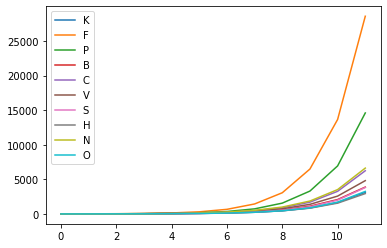

In [107]:
for c in df.columns:
    df[c].plot(label=c)
plt.legend()

In [83]:
import pandas as pd

In [85]:
table

[[('K', 7),
  ('F', 7),
  ('P', 6),
  ('B', 5),
  ('C', 4),
  ('V', 3),
  ('S', 3),
  ('H', 2),
  ('N', 1),
  ('O', 1)],
 [('F', 13),
  ('K', 10),
  ('C', 10),
  ('B', 9),
  ('V', 9),
  ('P', 9),
  ('S', 5),
  ('N', 5),
  ('H', 4),
  ('O', 3)],
 [('F', 31),
  ('P', 22),
  ('C', 19),
  ('V', 16),
  ('K', 14),
  ('B', 14),
  ('N', 11),
  ('H', 9),
  ('O', 9),
  ('S', 8)],
 [('F', 64),
  ('P', 40),
  ('V', 36),
  ('C', 33),
  ('N', 29),
  ('K', 27),
  ('B', 26),
  ('H', 17),
  ('S', 17),
  ('O', 16)],
 [('F', 140),
  ('P', 82),
  ('N', 67),
  ('C', 64),
  ('V', 59),
  ('B', 51),
  ('K', 40),
  ('O', 36),
  ('H', 36),
  ('S', 34)],
 [('F', 305),
  ('P', 167),
  ('N', 135),
  ('C', 128),
  ('V', 117),
  ('B', 88),
  ('K', 75),
  ('S', 69),
  ('H', 68),
  ('O', 65)],
 [('F', 663),
  ('P', 350),
  ('N', 273),
  ('C', 235),
  ('V', 212),
  ('B', 174),
  ('S', 143),
  ('K', 134),
  ('H', 127),
  ('O', 122)],
 [('F', 1439),
  ('P', 732),
  ('N', 518),
  ('C', 475),
  ('V', 398),
  ('B', 317),
  

In [84]:
pd.DataFrame()

,0,1,2,3,4,5,6,7,8,9
0,"(K, 7)","(F, 7)","(P, 6)","(B, 5)","(C, 4)","(V, 3)","(S, 3)","(H, 2)","(N, 1)","(O, 1)"
1,"(F, 13)","(K, 10)","(C, 10)","(B, 9)","(V, 9)","(P, 9)","(S, 5)","(N, 5)","(H, 4)","(O, 3)"
2,"(F, 31)","(P, 22)","(C, 19)","(V, 16)","(K, 14)","(B, 14)","(N, 11)","(H, 9)","(O, 9)","(S, 8)"
3,"(F, 64)","(P, 40)","(V, 36)","(C, 33)","(N, 29)","(K, 27)","(B, 26)","(H, 17)","(S, 17)","(O, 16)"
4,"(F, 140)","(P, 82)","(N, 67)","(C, 64)","(V, 59)","(B, 51)","(K, 40)","(O, 36)","(H, 36)","(S, 34)"
5,"(F, 305)","(P, 167)","(N, 135)","(C, 128)","(V, 117)","(B, 88)","(K, 75)","(S, 69)","(H, 68)","(O, 65)"
6,"(F, 663)","(P, 350)","(N, 273)","(C, 235)","(V, 212)","(B, 174)","(S, 143)","(K, 134)","(H, 127)","(O, 122)"
7,"(F, 1439)","(P, 732)","(N, 518)","(C, 475)","(V, 398)","(B, 317)","(S, 268)","(H, 240)","(K, 239)","(O, 239)"
8,"(F, 3058)","(P, 1559)","(N, 991)","(C, 892)","(V, 741)","(B, 592)","(S, 536)","(O, 458)","(K, 457)","(H, 445)"
9,"(F, 6487)","(P, 3303)","(N, 1861)","(C, 1699)","(V, 1385)","(B, 1115)","(S, 1032)","(O, 884)","(K, 860)","(H, 831)"


In [30]:
poly.insert(1, "C")

In [31]:
poly

deque(['N', 'C', 'N', 'C', 'B'])

In [17]:
def polymerize(code, gens, n_steps):
    for _ in tqdm(range(n_steps)):
        new_code = ""
        for i in range(len(code) - 1):
            bi = code[i : i + 2]
            c = gens[bi]
            new_code += f"{bi[:1]}{c}"
            if i == len(code) - 2:
                new_code += code[-1]
        code = new_code
    return code

In [21]:
code = data[0]
rules = {x[0]: x[1] for x in [x.split(" -> ") for x in data[2:]]}

c = Counter(polymerize(code, rules, 10))
t = c.most_common()
t[0][1] - t[-1][1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 202.25it/s]


5656

# 2

In [11]:
from collections import namedtuple, defaultdict, deque

In [7]:
Code = namedtuple("Code", "pairs remainder count")

In [8]:
def build_code(code_str) -> Code:
    d = defaultdict(int)
    for i in range(len(code_str) - 1):
        bi = code_str[i : i + 2]
        d[bi] += 1
    r = code_str[-1] if len(code_str) % 2 == 1 else ""
    c = dict(Counter(code_str).most_common())
    return Code(d, r, c)

In [ ]:
def step(code: Code, rules: dict) -> Code:
    new_pairs = defaultdict(int)
    for k, v in code.pairs.items():
        c = rules[k]
        code.count[c] += v
        

In [85]:
cd = build_code(code)

In [86]:
cd

Code(pairs=defaultdict(<class 'int'>, {'KH': 1, 'HS': 1, 'SS': 1, 'SC': 1, 'CS': 1, 'SK': 1, 'KK': 1, 'KC': 1, 'CP': 1, 'PF': 1, 'FK': 1, 'KP': 1, 'PP': 1, 'PB': 1, 'BB': 1, 'BO': 1, 'OK': 1, 'KV': 1, 'VF': 1}), remainder='', count={'K': 5, 'S': 3, 'P': 3, 'C': 2, 'F': 2, 'B': 2, 'H': 1, 'O': 1, 'V': 1})

In [83]:
cd.pairs

defaultdict(int,
            {'KH': 1,
             'HS': 1,
             'SS': 1,
             'SC': 1,
             'CS': 1,
             'SK': 1,
             'KK': 1,
             'KC': 1,
             'CP': 1,
             'PF': 1,
             'FK': 1,
             'KP': 1,
             'PP': 1,
             'PB': 1,
             'BB': 1,
             'BO': 1,
             'OK': 1,
             'KV': 1,
             'VF': 1})

In [ ]:
def polymerize_optimal(code, gens, n_steps):
    